In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
from matplotlib import cm as CM
from image import *
from tqdm import tqdm
import torch
from model import CSRNet
from tqdm import tqdm
%matplotlib inline

F:\Program Files\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# function to create density maps for images
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree  
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [3]:
#setting the root to the Shanghai dataset you have downloaded
# change the root path as per your location of dataset
root = 'F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech'

In [4]:
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_train,part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground-truth'), 'w') as hf:
            hf['density'] = k

F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_1.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_10.jpg
(683, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_100.jpg
(654, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_101.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_102.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_103.jpg
(400, 400)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_104.jpg
(405, 540)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_105.jpg
(632, 990)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimat

F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_22.jpg
(630, 961)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_220.jpg
(377, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_221.jpg
(679, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_222.jpg
(522, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_223.jpg
(661, 817)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_224.jpg
(619, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_225.jpg
(549, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_226.jpg
(615, 922)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstim

(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_71.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_72.jpg
(663, 962)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_73.jpg
(544, 932)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_74.jpg
(479, 720)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_75.jpg
(681, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_76.jpg
(563, 832)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_77.jpg
(684, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/train_data\images\IMG_78.jpg
(768, 1024)
generate density...
done

(683, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/test_data\images\IMG_3.jpg
(427, 640)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/test_data\images\IMG_30.jpg
(511, 766)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/test_data\images\IMG_31.jpg
(615, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/test_data\images\IMG_32.jpg
(683, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/test_data\images\IMG_33.jpg
(577, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/test_data\images\IMG_34.jpg
(200, 300)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/test_data\images\IMG_35.jpg
(534, 832)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_A/test_data\images\IMG_36.jpg
(424, 1024)
generate density...
done.
F:/SLII

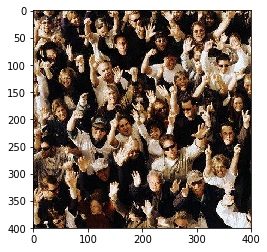

In [7]:
plt.imshow(Image.open(img_paths[5]))

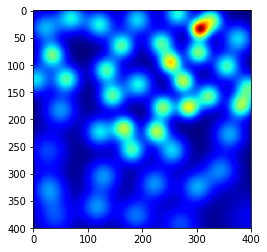

In [9]:
gt_file = h5py.File(img_paths[5].replace('.jpg','.h5').replace('images','ground-truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [10]:
np.sum(groundtruth)

39.189857

In [10]:
path_sets = [part_B_train,part_B_test]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
        
# creating density map for part_b images

for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground-truth'), 'w') as hf:
            hf['density'] = k

F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_1.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_10.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_100.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_101.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_102.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_103.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_104.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_105.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEsti

F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_22.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_220.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_221.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_222.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_223.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_224.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_225.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_226.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEs

F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_340.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_341.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_342.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_343.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_344.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_345.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_346.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/train_data\images\IMG_347.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdE

(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_101.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_102.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_103.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_104.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_105.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_106.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_107.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_108.jpg
(768, 1024)
generate density...


(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_223.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_224.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_225.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_226.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_227.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_228.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_229.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_23.jpg
(768, 1024)
generate density...
d

F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_60.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_61.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_62.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_63.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_64.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_65.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_66.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/ShanghaiTech\part_B/test_data\images\IMG_67.jpg
(768, 1024)
generate density...
done.
F:/SLIIT/4th Year/CrowdEstimation/Shangh

In [14]:
#cd "F:/SLIIT/4th Year/CrowdEstimation"
!python train.py part_A_train.json part_A_val.json 0 0

epoch 0, processed 0 samples, lr 0.0000001000


F:\Program Files\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
F:\Program Files\Anaconda\lib\site-packages\torch\nn\_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Traceback (most recent call last):
  File "train.py", line 232, in <module>
    main()        
  File "train.py", line 93, in main
    train(train_list, model, criterion, optimizer, epoch)
  File "train.py", line 150, in train
    loss.backward()
  File "F:\Program Files\Anaconda\lib\site-packages\torch\tensor.py", line 107, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph)
  File "F:\Program Files\Anaconda\lib\site-packages\torch\autograd\__init_

In [11]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                  ])

In [12]:
model = CSRNet()

In [13]:
#defining the model
model = model.cuda()

In [17]:
#loading the trained weights
checkpoint = torch.load('part_A/0model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])

FileNotFoundError: [Errno 2] No such file or directory: 'part_A/0model_best.pth.tar'

In [15]:
mae = 0
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground-truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
print (mae/len(img_paths))

  0%|▏                                                                                 | 1/482 [00:03<30:25,  3.80s/it]


RuntimeError: CUDA out of memory. Tried to allocate 172.00 MiB (GPU 0; 2.00 GiB total capacity; 1.19 GiB already allocated; 128.62 MiB free; 19.66 MiB cached)

In [16]:
#prediction
from matplotlib import cm as c
img = transform(Image.open('part_A/test_data/images/IMG_100.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('part_A/test_data/ground-truth/IMG_100.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('part_A/test_data/images/IMG_100.jpg'))
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'part_A/test_data/images/IMG_100.jpg'